# Linear regression

Linear regression is the simplest linear method used for modelling the relationship between the independent variables and the dependent ones. It tries to estimate it by finding a line which is as close as possible to all the data points. 

\begin{equation}
y=ax+b
\end{equation}

#### Boston housing example

[Boston housing](https://www.kaggle.com/c/boston-housing) is a very simple dataset built from some statistical data of the houses of Boston suburbs and the median prices (in $1000s) of owner-occupied homes for each zone.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

# Loading the dataset with pandas
boston_data = load_boston()
boston_housing_df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
boston_housing_df["MEDV"] = boston_data.target
boston_housing_df.head()

/Users/bartoszkrawiec/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


There are several features in the dataset:

* **crim**  per capita crime rate by town.
* **zn** proportion of residential land zoned for lots over 25,000 sq.ft.
* **indus** proportion of non-retail business acres per town.
* **chas** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* **nox** nitrogen oxides concentration (parts per 10 million).
* **rm** average number of rooms per dwelling.
* **age** proportion of owner-occupied units built prior to 1940.
* **dis** weighted mean of distances to five Boston employment centres.
* **rad** index of accessibility to radial highways.
* **tax** full-value property-tax rate per \$10000
* **ptratio** pupil-teacher ratio by town.
* **black** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* **lstat** lower status of the population (percent).
* **medv** median value of owner-occupied homes in \$1000s.

The target variable $y$ is called *medv*.

#### 2D linear regression

For the simplicity, we'll consider a 2D example and try to predict the *medv* (median value), given *crim* (per capita crime rate). Let's take a look at the data in the first place.

(array([-0.41519028]), 24.03310617412388)

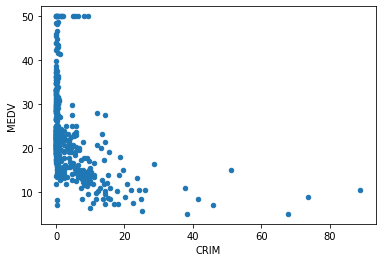

In [2]:
boston_housing_df.plot(x="CRIM", y="MEDV", kind="scatter")

from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression and find the coeffs
linear_regression = LinearRegression()
linear_regression.fit(X=boston_housing_df[["CRIM"]], 
                      y=boston_housing_df["MEDV"])
linear_regression.coef_, linear_regression.intercept_ 

We can try to draw the linear regression $y$ using matplotlib. In the code below we take the MEDV features as $y$ and CRIM as $x$.

71.69073588196659

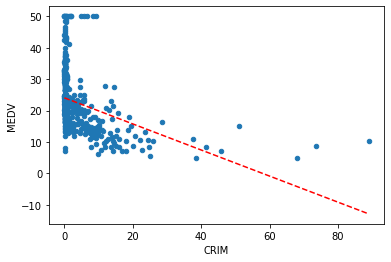

In [3]:
# Create a polynomial to be drawn on the plot
coefficients = np.append(linear_regression.coef_, 
                         linear_regression.intercept_)
polynomial = np.poly1d(coefficients)

# Calculate the values for a selected range
x_values = np.linspace(0, boston_housing_df["CRIM"].max())
y_values = polynomial(x_values)

# Display a scatter plot: crim vs medv and regressed line
boston_housing_df.plot(x="CRIM", y="MEDV", kind="scatter")
plt.plot(x_values, y_values, color="red", linestyle="dashed")

from sklearn.metrics import mean_squared_error

y_pred = linear_regression.predict(boston_housing_df[["CRIM"]]) 
y_true = boston_housing_df["MEDV"]
mean_squared_error(y_true, y_pred)

### Multidimensional linear regression

An intuitive selection of the possibile predictor did not help to perform a regression of the median value in the area properly. For a low crime rate it looks better, but when it comes to really high crime rate, the predicted value is negative.

For the purposes of selecting predictors, we may consider the variables which have the highest correlation with the target variable.

In [4]:
# Calculate the Pearson correlation coefficients
boston_housing_df.corr()["MEDV"]

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

The absolute value of correlation coefficients is highest for *rm* (0.689598) and *lstat* (-0.738600). That means, these values are possibly the best predictors for the target variable and we can consider them in a 3D regression.

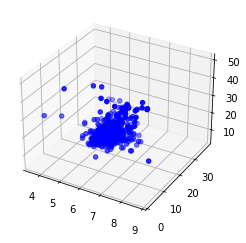

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Display 3D scatter: rm, lstat vs medv
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(boston_housing_df["RM"], boston_housing_df["LSTAT"], 
           boston_housing_df["MEDV"], c="blue")
plt.show()

Let's find the coefficiencies and build a linear regression instance.

In [6]:
linear_regression = LinearRegression()
linear_regression.fit(X=boston_housing_df[["RM", "LSTAT"]], 
                      y=boston_housing_df["MEDV"])
linear_regression.coef_, linear_regression.intercept_ 

(array([ 5.09478798, -0.64235833]), -1.358272811874425)

For a three-dimensional case we need to calculate three values. We get three coeffiencies that are used to get the $z$ values.

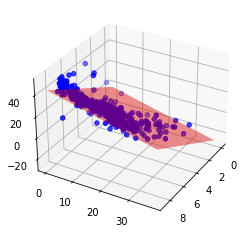

In [7]:
# Calculate coefficients of 2d polynomial
coefficients = np.append(linear_regression.coef_, 
                         linear_regression.intercept_)

# Calculate the values for a selected range
x = np.linspace(0, boston_housing_df["RM"].max())
y = np.linspace(0, boston_housing_df["LSTAT"].max())
x_values, y_values = np.meshgrid(x, y)
z_values = coefficients[0] * x_values + coefficients[1] * y_values + coefficients[2]

# Display 3D scatter: rm, lstat vs medv and regressed line
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(boston_housing_df["RM"], boston_housing_df["LSTAT"], 
           boston_housing_df["MEDV"], c="blue")
ax.plot_surface(x_values, y_values, z_values, linewidth=0.2, 
                color="red", alpha=0.5)
angle=30
ax.view_init(30, angle)
plt.show()

The prediction of linear regression can be done with the ``predict`` method. The cost function of a linear regression is calculated with mean squared error function.

In [8]:
y_pred = linear_regression.predict(boston_housing_df[["RM", "LSTAT"]]) 
y_true = boston_housing_df["MEDV"]
mean_squared_error(y_true, y_pred)

30.512468777299468

# Linear regression under the hood

To understand the method in more details we use a simple example of humans heights and weights values.

In [9]:
heights = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1)
weights = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1)

For comparison, we use the linear regression available in sklearn library. 

In [10]:
from sklearn import linear_model
import numpy as np

regr = linear_model.LinearRegression()
regr.fit(heights, weights)

LinearRegression()

As in the previous example, we can plot the slope.

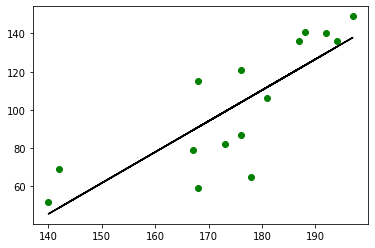

In [11]:
plt.scatter(heights, weights,color='g')
plt.plot(heights, regr.predict(heights),color='k')

plt.show()

The coeffieciencies are calculated as:

In [12]:
print(regr.coef_)
print(regr.intercept_)

[[1.61814247]]
[-180.92401772]


If we calcualte the $y$ value for $x=150$:

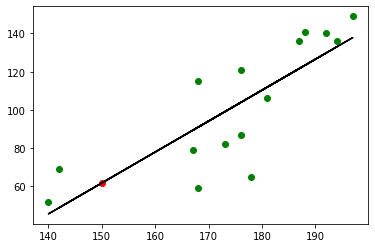

In [13]:
plt.scatter(heights, weights,color='g')
plt.plot(heights, regr.predict(heights),color='k')

x= 150
y = 61.797
plt.scatter(x, y,color='r')

plt.show()

## Linear regression from scratch

And now we can use the data set to implement the linear regression from scratch.

In [14]:
x = heights.reshape(15,1)
y = weights.reshape(15,1)

We should add the bias column before doing the calculation. 

In [15]:
x = np.append(x, np.ones((15,1)), axis = 1)

The equation for calculating the weights is 
\begin{equation}
(X^{T}X)^{-1}X^{T}y
\end{equation}

In [16]:
w = np.dot(np.linalg.inv(np.dot(np.transpose(x),x)),np.dot(np.transpose(x),y))

The weitghs we can as the output are exaclty the same as we get using sklearn implementation of the linear regression method.

In [17]:
w

array([[   1.61814247],
       [-180.92401772]])

To make the prediction a bit easier, we can implement a short function where the arguments are: 
- inputs - feature $x$ of objects,
- w - weights,
- b - bias.
The calculation is easy and use the linear regression equation $y=wx+b$.

In [18]:
def reg_predict(inputs, w, b):
    results = []
    for inp in inputs:
        results.append(inp*w+b)
    return results

Finally, we can plot the predicted values using the function above.

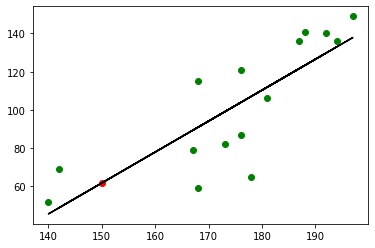

In [19]:
plt.scatter(heights.flatten(), weights.flatten(),color='g')
plt.plot(heights.flatten(), reg_predict(heights.flatten(), w[0], w[1]) ,color='k')

x1 = 150
y = reg_predict([x1], w[0], w[1])[0]
plt.scatter(x1, y,color='r')

plt.show()

In [20]:
reg_predict(x.flatten(), w[1], w[0])

[array([-34012.0971882]),
 array([-179.30587525]),
 array([-32745.62906419]),
 array([-179.30587525]),
 array([-35640.41334765]),
 array([-179.30587525]),
 array([-30393.61683388]),
 array([-179.30587525]),
 array([-30212.69281616]),
 array([-179.30587525]),
 array([-33831.17317049]),
 array([-179.30587525]),
 array([-32202.85701104]),
 array([-179.30587525]),
 array([-35097.6412945]),
 array([-179.30587525]),
 array([-25327.74433782]),
 array([-179.30587525]),
 array([-31841.00897561]),
 array([-179.30587525]),
 array([-30393.61683388]),
 array([-179.30587525]),
 array([-34735.79325907]),
 array([-179.30587525]),
 array([-31298.23692246]),
 array([-179.30587525]),
 array([-25689.59237325]),
 array([-179.30587525]),
 array([-31841.00897561]),
 array([-179.30587525])]

# Ridge regression

Ridge regression use a regularizer and the equation is a bit more complex compare to the regular linear regression:
\begin{equation}
 \sum_{i=1}^{M}(y_{i}-\sum_{j=0}^{p}w_{j}\dot x_{ij})^{2} + \lambda\sum_{j=0}^{p}w^{2}_{j}.
\end{equation}
We have an additional parameter $\lambda$ that is known in sklearn as $\alpha$. It's the regularizer that together with $w^{2}_{j}$ is known as the L2 regularizator.

In [21]:
from sklearn.linear_model import Ridge

alpha = 0.1

heights1 = np.asmatrix(np.c_[np.ones((15,1)), heights])

ridge_regression = Ridge(alpha=alpha, fit_intercept=False)
ridge_regression.fit(X=heights1, 
                      y=weights)
ridge_regression.coef_, ridge_regression.intercept_ 

/Users/bartoszkrawiec/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


(array([[-101.72397081,    1.16978757]]), 0.0)

Similar to the regular linear regression, the slop can be drawn as below.

/Users/bartoszkrawiec/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


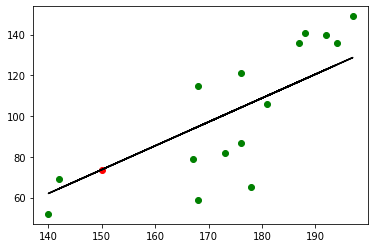

In [22]:
plt.scatter(heights, weights,color='g')
plt.plot(heights, ridge_regression.predict(heights1),color='k')

x = 150
y = reg_predict([150], ridge_regression.coef_[0][1], ridge_regression.coef_[0][0])[0]
plt.scatter(x, y,color='r')

y = ridge_regression.coef_[0][1] * 150 + ridge_regression.coef_[0][0]

plt.show()

For $x_{1}=150$ the result is a bit different compared to the regression without the regularization.

In [23]:
y = ridge_regression.coef_[0][1] * 150 + ridge_regression.coef_[0][0]
print(y)

73.74416542365165


We can write the equation in a matrix-way as:
\begin{equation}
(X^{T}X+\alpha\dot W)^{-1}X^{T}y
\end{equation}

In [24]:
y = weights
x = np.asmatrix(np.c_[np.ones((15,1)),heights])

I = np.identity(2)
alpha = 0.1

w = np.linalg.inv(x.T*x + alpha * I)*x.T*y

The weights are calculated same as in case of sklearn.

In [25]:
w=w.ravel()

The plot looks as below. We see the the slope start with higer $y$ values compared to the regular linear regression.

IndexError: index 1 is out of bounds for axis 0 with size 1

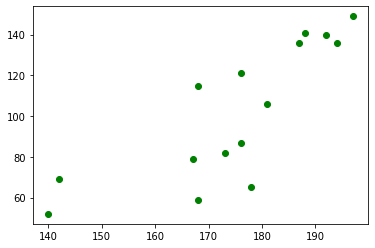

In [26]:
plt.scatter(heights, weights, color='g')
plt.plot(heights, reg_predict(heights.flatten(), w[1], w[0]),color='k')


x1= 150
y = x*w[1]+w[0] 
plt.scatter(x1, y,color='r')

plt.show()

# Lasso regression

Lasso regression uses the L1 regularization. The equation is very similar to the Ridge one, but instead of $w^{2}$ we use the magnitude of $w$. 

\begin{equation}
 \sum_{i=1}^{M}(y_{i}-\sum_{j=0}^{p}w_{j}\dot x_{ij})^{2} + \lambda\sum_{j=0}^{p}|w_{j}|.
\end{equation}

In [ ]:
from sklearn.linear_model import Lasso

alpha = 0.1
heights1 = np.asmatrix(np.c_[np.ones((15,1)), heights])

lasso_regression = Lasso(alpha=alpha)
lasso_regression.fit(X=heights, 
                      y=weights)
lasso_regression.coef_, lasso_regression.intercept_ 

In [ ]:
plt.scatter(heights, weights,color='g')
plt.plot(heights, lasso_regression.predict(heights),color='k')

plt.show()